In [33]:
#import all the dependencies
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as req
import datetime
import matplotlib.patches as mpatches 
from matplotlib import font_manager as fm
import seaborn as sns
import gender
import scipy.stats as stats
import math
from mpl_toolkits.basemap import Basemap

In [34]:
#read the file and store it in dataframe

starbucks=pd.read_csv("../Datasets/directory.csv")
starbucks=starbucks.dropna(axis=1, how='all')
starbucks=starbucks.drop(["Store Name","Street Address","Timezone","Phone Number"],axis=1)
starbucks["New_Country_Code"]=''
starbucks["Avg_Temp_celcius"]=''
starbucks.head()

,Brand,Store Number,Ownership Type,City,State/Province,Country,Postcode,Longitude,Latitude,New_Country_Code,Avg_Temp_celcius
0,Starbucks,47370-257954,Licensed,Andorra la Vella,7,AD,AD500,1.53,42.51,,
1,Starbucks,22331-212325,Licensed,Ajman,AJ,AE,NaN,55.47,25.42,,
2,Starbucks,47089-256771,Licensed,Ajman,AJ,AE,NaN,55.47,25.39,,
3,Starbucks,22126-218024,Licensed,Abu Dhabi,AZ,AE,NaN,54.38,24.48,,
4,Starbucks,17127-178586,Licensed,Abu Dhabi,AZ,AE,NaN,54.54,24.51,,


C:\Users\lawre\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\lawre\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


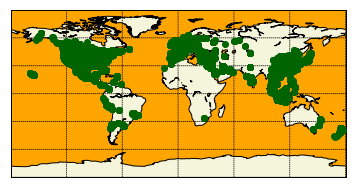

In [35]:
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')


map.drawmapboundary(fill_color='orange')
map.fillcontinents(color='beige',lake_color='orange')
map.drawcoastlines()
# draw parallels and meridians.
map.drawparallels(np.arange(-90.,91.,30.))
map.drawmeridians(np.arange(-180.,181.,60.))
# lons=[]
# lat=[]


lon=starbucks.Longitude.get_values()
lon.tolist()
lat=starbucks.Latitude.get_values()
lat.tolist()

x, y = map(lon, lat)


map.scatter(x, y, marker="o",color='darkgreen',zorder=10)

plt.show()

In [36]:
#add the continent for each countries

with open('../Datasets/continent_country.json') as json_data:
    d = json.load(json_data)   
    
starbucks["Continent"]=starbucks["Country"].map(d)

#drop NA value for thr column "Continent"

starbucks=starbucks.dropna(subset=["Continent"])

In [37]:
starbucks_Lisence=starbucks.loc[starbucks["Ownership Type"]=="Licensed"]
starbucks_Joint_Venture=starbucks.loc[starbucks["Ownership Type"]=="Joint Venture"]
starbucks_Company_Owned=starbucks.loc[starbucks["Ownership Type"]=="Company Owned"]
starbucks_Franchise=starbucks.loc[starbucks["Ownership Type"]=="Franchise"]

starbucks_continent_l=starbucks_Lisence.groupby(["Continent"])["Store Number"].count()
starbucks_continent_j=starbucks_Joint_Venture.groupby(["Continent"])["Store Number"].count()
starbucks_continent_c=starbucks_Company_Owned.groupby(["Continent"])["Store Number"].count()
starbucks_continent_f=starbucks_Franchise.groupby(["Continent"])["Store Number"].count()

In [38]:
# list of continents
continents = list(starbucks_continent_l.index)

#list of group buckets
buckets = ["Licensed", "Franchised", "Joint Venture", "Company Owned"]
colors = ['blue','green',"yellow","red"]

# change groupby values to a dict
starbucks_l = starbucks_continent_l.to_dict()
starbucks_f = starbucks_continent_f.to_dict()
starbucks_c = starbucks_continent_c.to_dict()
starbucks_j = starbucks_continent_j.to_dict()

continents_df = pd.DataFrame(continents, columns=["Continent"])
# continents_df.set_index("Continent")

# create placehoders for buckets in dataframe for columns to be plotted
for b in buckets:
    continents_df[b] = ""

# need to make sure that all buckets (License, Franchsise, Joint Venture, and Company Owned) have a continent data, enter 0 fill no key found
for index, row in continents_df.iterrows():
    continents_df.loc[index, "Licensed"] = starbucks_l.get(row["Continent"], 0)
    continents_df.loc[index, "Franchised"] = starbucks_f.get(row["Continent"], 0)
    continents_df.loc[index, "Joint Venture"] = starbucks_j.get(row["Continent"], 0)
    continents_df.loc[index, "Company Owned"] = starbucks_c.get(row["Continent"], 0)
        
                  
continents_df


,Continent,Licensed,Franchised,Joint Venture,Company Owned
0,Africa,43,0,0,0
1,Asia,1866,0,3771,1859
2,Australia,46,0,0,0
3,Europe,705,317,204,647
4,North America,6405,0,0,9324
5,South America,307,0,1,102


In [39]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom', fontsize=12,rotation=90,fontweight='bold')

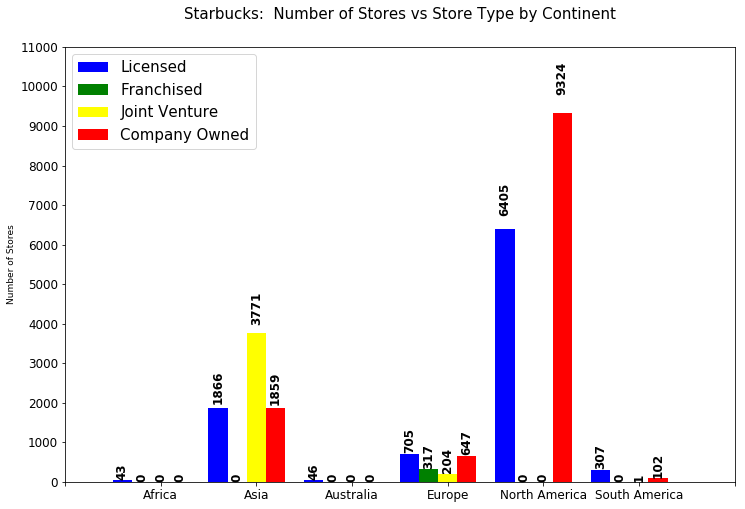

<Figure size 432x288 with 0 Axes>

In [40]:
# set fontsize of labels
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

nbrContinents = len(continents_df["Continent"])
rects = []

x_axis = np.arange(0, nbrContinents)

fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111)

# plot each bucket that was grouped by stores
width = 0.20
offset = -(width*2)
for c, b in zip(colors, buckets):
    rects.append(ax.bar(x_axis+offset,continents_df[b],width=0.2, linewidth=2, color=c,align='center', label=b))
    offset += width
    
# set up tick values
ax.set_yticks(np.arange(0, 12000, 1000))
ax.set_xticks(np.arange(-1, nbrContinents+1))

# add label at the top of the bar
for r in rects:
    autolabel(r)
    

# setup tick labels; begin with a blank tiick label
xlabels = [""]
xlabels.extend(continents)

ax.set_xticklabels(xlabels)
ylbl = ax.set_ylabel("Number of Stores", fontsize=9)
title = ax.set_title("Starbucks:  Number of Stores vs Store Type by Continent", fontsize=15)
title.set_position([.5, 1.05])


plt.legend(loc="best", fontsize=15)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Store Type By Continent.png")

In [41]:
#Convert the country code to new format
    
with open('../Datasets/country.json') as json_data:
    c = json.load(json_data)   
    
starbucks["New_Country_Code"]=starbucks["Country"].map(c)

#drop NA value for thr column "Continent"

starbucks=starbucks.dropna(subset=["New_Country_Code"]) 

starbucks.head()

,Brand,Store Number,Ownership Type,City,State/Province,Country,Postcode,Longitude,Latitude,New_Country_Code,Avg_Temp_celcius,Continent
0,Starbucks,47370-257954,Licensed,Andorra la Vella,7,AD,AD500,1.53,42.51,AND,,Europe
1,Starbucks,22331-212325,Licensed,Ajman,AJ,AE,NaN,55.47,25.42,ARE,,Asia
2,Starbucks,47089-256771,Licensed,Ajman,AJ,AE,NaN,55.47,25.39,ARE,,Asia
3,Starbucks,22126-218024,Licensed,Abu Dhabi,AZ,AE,NaN,54.38,24.48,ARE,,Asia
4,Starbucks,17127-178586,Licensed,Abu Dhabi,AZ,AE,NaN,54.54,24.51,ARE,,Asia


In [42]:
#collect
list_countries={}

for index,row in starbucks.iterrows():
    
    value=row["New_Country_Code"]
    
    if value not in list_countries.keys():
        
        url=("http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/%s" %(value))
        response=req.get(url).json()
        Avg_temp=response[-1]["data"]
        starbucks.loc[index,"Avg_Temp_celcius"]=Avg_temp
        list_countries.update({value:Avg_temp})
        
    else:
        
        starbucks["Avg_Temp_celcius"]=starbucks["New_Country_Code"].map(list_countries)

In [43]:
# calculate temperature in Fahrenheit
starbucks["Fahrenheit"] = round(((starbucks['Avg_Temp_celcius']*9)/5 + 32), 0)
starbucks_Temp= starbucks.groupby(['Fahrenheit']).count()

starbucks.head()

,Brand,Store Number,Ownership Type,City,State/Province,Country,Postcode,Longitude,Latitude,New_Country_Code,Avg_Temp_celcius,Continent,Fahrenheit
0,Starbucks,47370-257954,Licensed,Andorra la Vella,7,AD,AD500,1.53,42.51,AND,9.627084,Europe,49.0
1,Starbucks,22331-212325,Licensed,Ajman,AJ,AE,NaN,55.47,25.42,ARE,28.020578,Asia,82.0
2,Starbucks,47089-256771,Licensed,Ajman,AJ,AE,NaN,55.47,25.39,ARE,28.020578,Asia,82.0
3,Starbucks,22126-218024,Licensed,Abu Dhabi,AZ,AE,NaN,54.38,24.48,ARE,28.020578,Asia,82.0
4,Starbucks,17127-178586,Licensed,Abu Dhabi,AZ,AE,NaN,54.54,24.51,ARE,28.020578,Asia,82.0


In [44]:
# create bin of temperature ranges
nbrofbins = 5
tempRange = []
rangeToUse = (starbucks['Fahrenheit'].max() - starbucks['Fahrenheit'].min())/5

for i in np.arange(nbrofbins):
    tempRange.append(round(starbucks['Fahrenheit'].min() + (rangeToUse*i), 0))

tempRange = np.histogram(starbucks['Fahrenheit'], bins=5, range=None, normed=False, weights=None)
# print(tempRange)
bins = tempRange[1]
# bins = [30, 50, 65, 100]
group_names= ["VERY COLD", "COLD", "AVERAGE", "WARM", "HOT"]

categories = pd.cut(starbucks['Fahrenheit'], bins, labels=group_names)
starbucks['categories'] = pd.cut(starbucks['Fahrenheit'], bins, labels=group_names)
starbucks['tempBinned'] = pd.cut(starbucks['Fahrenheit'], bins)
starbucks

temperature_group = starbucks.groupby("categories")['Store Number'].count()
temperature_group
temperature_df = pd.DataFrame(temperature_group)

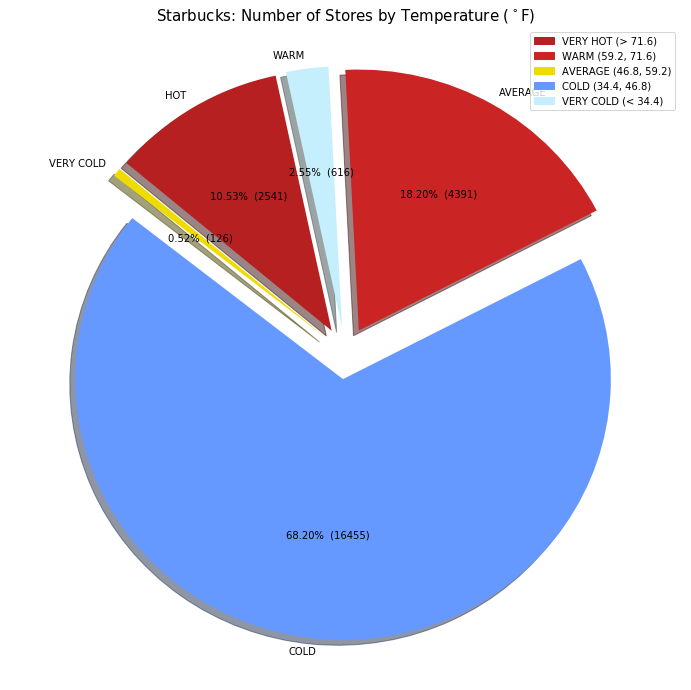

<Figure size 432x288 with 0 Axes>

In [45]:
# add values and pct
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Data to plot
colors = ['#EEDB00','#6699FF','#cb2424','#C5EFFD','#b62020']
labels = list(temperature_df.index)
    
labels = list(temperature_df.index)
plt.figure(figsize=(12,12))
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice
 

# Plot
patches, texts, autotexts = plt.pie(temperature_df['Store Number'], explode=explode, labels=labels, colors=colors, labeldistance=1.05,
        autopct=make_autopct(temperature_df['Store Number']), shadow=True, startangle=140)

handles, labels = ax.get_legend_handles_labels()

vc_patch = mpatches.Patch(color=colors[4], label="VERY HOT (> 71.6)")
c_patch = mpatches.Patch(color=colors[2], label="WARM (59.2, 71.6)")
a_patch = mpatches.Patch(color=colors[0], label="AVERAGE (46.8, 59.2)")
h_patch = mpatches.Patch(color=colors[1], label="COLD (34.4, 46.8)")
vh_patch = mpatches.Patch(color=colors[3], label="VERY COLD (< 34.4)")

plt.legend(handles=[vc_patch, c_patch, a_patch, h_patch, vh_patch], frameon=True, loc="upper right")
    
proptease = fm.FontProperties()
proptease.set_size('medium')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.title("Starbucks: Number of Stores by Temperature ($^\circ$F)", fontsize=15) 
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Stores by Temperature.png")